In [24]:
import numpy as np
import scipy
import random
import matplotlib.pyplot as plt

from tools import depletion_func, calc_total_reward_rate

In [25]:
# Example usage
num_patches = 2
travel_time = 3
max_time = [1,9]
reward_value = [5,5]

# Initial probabilities of reward in each patch
a = [.9, .4]
b = [2.76, 2.76]
c = [.1278, .1278]
d = [0, 0]

total_reward_rate = calc_total_reward_rate(range(num_patches), travel_time, max_time, reward_value, a, b, c, d)
print(f"Total reward rate: {total_reward_rate}")

Total reward rate: 0.9889599618925845


In [26]:
max_stops = 20

# Initial probabilities of reward in each patch
grid = np.zeros((max_stops,max_stops))
for x in range(max_stops):
    for y in range (max_stops):
        total_reward_rate = calc_total_reward_rate(range(num_patches), travel_time, [x,y], reward_value, a, b, c, d)
        grid[x,y] = total_reward_rate

Text(0, 0.5, 'stay in patch 2')

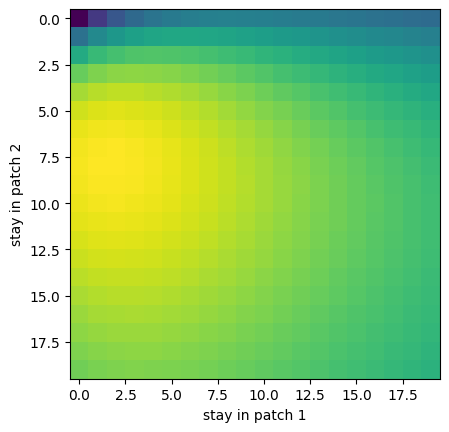

In [27]:
plt.imshow(grid)
plt.xlabel('stay in patch 1')
plt.ylabel('stay in patch 2')

In [28]:
# Find the indices of the maximum value(s) in the grid
best_time = np.unravel_index(grid.argmax(), grid.shape)

# Print the maximum value(s) and their coordinates
max_values = grid[best_time]
print('max reward rate: ' +str(max_values))
print('optimal stops: ' +str(best_time[0]) +' , '+str(best_time[1]))

max reward rate: 1.7275262225772854
optimal stops: 8 , 2


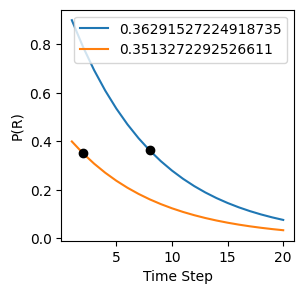

In [29]:
# Create a range of time steps
time_steps = np.arange(max_stops)

# Plot the depletion rate over time
plt.figure(figsize=(3, 3))

for patch_id in range(num_patches): #could change this to a list of patches in order
    
    # Compute the depletion rate for each time step
    p_R = [depletion_func(a[patch_id],b[patch_id],c[patch_id],d[patch_id],t) for t in time_steps]

    plt.plot(time_steps+1, p_R,label = str(p_R[best_time[patch_id]-1]))
    plt.plot(best_time[patch_id], p_R[best_time[patch_id]-1],'ok')

plt.xlabel('Time Step')
plt.ylabel('P(R)')
plt.legend()
plt.show()